In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

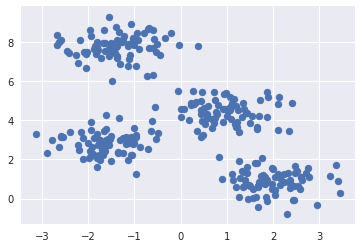

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

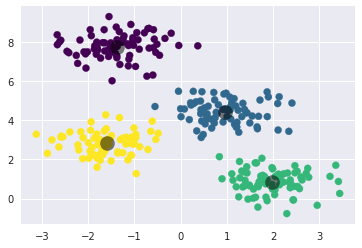

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

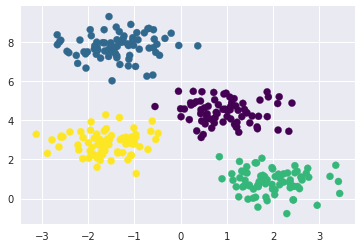

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [8]:
X[0]

array([0.83685684, 2.13635938])

In [12]:
path ='data/crime_astros_final.csv'
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date',
                       'Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
#df = df.set_index('date').sort_index(ascending=True)
df['game_on'] = np.where(df.game =='No Game',0,1)
df.drop(['game'],axis=1,inplace=True)
df.head(2)

,date,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game_on
0,2010-01-01,1A10,Auto Theft,bar/night club parking lot,1.0,0,1,Friday,Jan,2010,29.757212,-95.353294,"350 Hamilton St, Houston, TX 77002, USA",0.137184,0
1,2010-01-01,1A10,Theft,bar/night club,1.0,0,1,Friday,Jan,2010,29.753512,-95.363811,"1250 Caroline St, Houston, TX 77002, USA",0.549562,0


In [24]:
one_mile =  df.dist_stadium <= 1.0
df = df[one_mile]

In [25]:
t = df[['lat','lon']]

In [26]:
tm = t.as_matrix()

In [27]:
X = tm

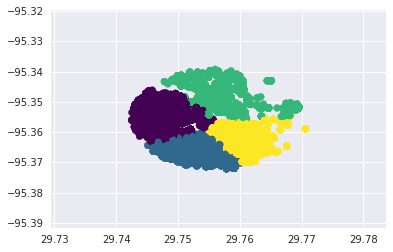

In [28]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');